# Hello

In [31]:
y.shape

torch.Size([1000, 1])

In [84]:
import torch
import torch.nn as nn
import torch.optim as optim

# Define the model
class TimeSeriesModel(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(TimeSeriesModel, self).__init__()
        self.hidden_size = hidden_size
        self.rnn = nn.GRU(input_size, input_size, batch_first=True)
        self.fc = nn.Linear(input_size, output_size)

    def forward(self, x):
        hidden, _ = self.rnn(x)
        output = self.fc(hidden[-1])
        return output

# Define the training loop
def train_model(model, train_data, num_epochs, learning_rate):
    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)
    all_outputs = []
    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0

        for inputs, targets in train_data:
            optimizer.zero_grad()
            outputs = model(inputs)
            all_outputs.append(outputs.detach())
            loss = criterion(outputs, targets)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()

        epoch_loss = running_loss / len(train_data)
        print(f"Epoch {epoch+1}/{num_epochs}, Loss: {epoch_loss:.4f}")
    return all_outputs

def train(data):
    # Prepare the data
    # Assuming you have your time series data in a tensor called 'data'
    # Split the data into input and target sequences
    input_seq = data[:, :-1]
    target_seq = data[:, 1:]

    # Create a DataLoader for batching the data
    #train_data = torch.utils.data.DataLoader(torch.utils.data.TensorDataset(input_seq, target_seq), batch_size=1, shuffle=True)

    # Set the hyperparameters
    input_size = 1
    hidden_size = 128
    output_size = 1
    num_epochs = 200
    learning_rate = 0.01

    # Create an instance of the model
    model = TimeSeriesModel(input_size, hidden_size, output_size)

    # Train the model
    outputs = train_model(model, [(input_seq, target_seq)], num_epochs, learning_rate)
    return outputs
outputs = train(torch.tensor(y2[None, :, None], dtype=torch.float32))

/home/srush/Projects/AnnotatedMamba/.venv/lib/python3.10/site-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([1, 999, 1])) that is different to the input size (torch.Size([999, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch 1/200, Loss: 1.5437
Epoch 2/200, Loss: 1.5027
Epoch 3/200, Loss: 1.4626
Epoch 4/200, Loss: 1.4236
Epoch 5/200, Loss: 1.3855
Epoch 6/200, Loss: 1.3485
Epoch 7/200, Loss: 1.3124
Epoch 8/200, Loss: 1.2774
Epoch 9/200, Loss: 1.2433
Epoch 10/200, Loss: 1.2103
Epoch 11/200, Loss: 1.1783
Epoch 12/200, Loss: 1.1473
Epoch 13/200, Loss: 1.1173
Epoch 14/200, Loss: 1.0883
Epoch 15/200, Loss: 1.0603
Epoch 16/200, Loss: 1.0333
Epoch 17/200, Loss: 1.0073
Epoch 18/200, Loss: 0.9822
Epoch 19/200, Loss: 0.9581
Epoch 20/200, Loss: 0.9349
Epoch 21/200, Loss: 0.9126
Epoch 22/200, Loss: 0.8913
Epoch 23/200, Loss: 0.8708
Epoch 24/200, Loss: 0.8512
Epoch 25/200, Loss: 0.8325
Epoch 26/200, Loss: 0.8146
Epoch 27/200, Loss: 0.7975
Epoch 28/200, Loss: 0.7812
Epoch 29/200, Loss: 0.7656
Epoch 30/200, Loss: 0.7508
Epoch 31/200, Loss: 0.7368
Epoch 32/200, Loss: 0.7234
Epoch 33/200, Loss: 0.7108
Epoch 34/200, Loss: 0.6987
Epoch 35/200, Loss: 0.6873
Epoch 36/200, Loss: 0.6766
Epoch 37/200, Loss: 0.6664
Epoch 38/2

AttributeError: 'numpy.ndarray' object has no attribute 'numpy'

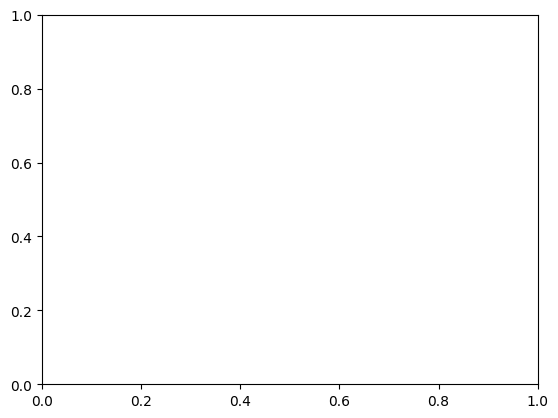

In [85]:
from celluloid import Camera
fig, ax = plt.subplots()
camera = Camera(fig)

for i in range(0, 200, 5):
    plt.scatter(range(1000), y2.numpy(), s=5, color="blue")
    ax.plot(outputs[i].detach().numpy().flatten(), color='red')
    camera.snap()
camera.animate().save('animation.gif')

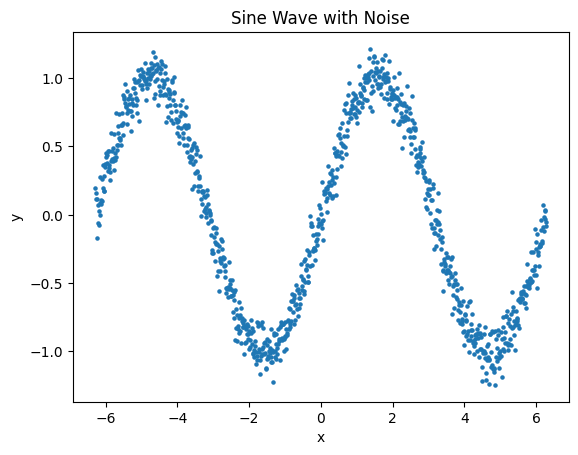

In [ ]:
import torch
import numpy as np
import torch.nn.functional as F
import matplotlib.pyplot as plt

# Set random seed for reproducibility
torch.manual_seed(42)


def make_data():
    # Generate x values
    x = torch.unsqueeze(torch.linspace(-2*np.pi, 2*np.pi, 1000), dim=1)

    # Generate y values with noise
    y = torch.sin(x) + torch.randn(x.size()) * 0.1

    # Plot the data
    plt.scatter(x.numpy(), y.numpy(), s=5)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Sine Wave with Noise')
    plt.show()
    return x, y
x, y = make_data()

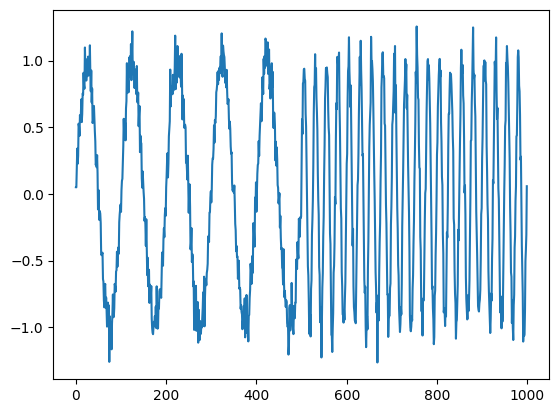

In [80]:
import numpy as np

def generate_time_series(freq1, freq2, noise_level):
    # Set random seed for reproducibility
    np.random.seed(42)

    # Define the time range
    time = np.linspace(0, 10, 1000)

    # Generate the first half of the time series as a sine wave
    data1 = np.sin(2 * np.pi * freq1 * time[:500])

    # Generate the second half of the time series as a sine wave with a high frequency
    data2 = np.sin(2 * np.pi * freq2 * time[500:])

    # Concatenate the two halves to create the final time series
    time_series = np.concatenate((data1, data2))

    # Add noise to the points
    noise = np.random.normal(0, noise_level, len(time_series))
    time_series_with_noise = time_series + noise

    return torch.tensor(time_series_with_noise)

# Example usage
freq1 = 1
freq2 = 4
noise_level = 0.1
y2 = generate_time_series(freq1, freq2, noise_level)
plt.plot(y2)

In [81]:
y2

array([ 4.96714153e-02,  4.90268599e-02,  1.90226884e-01,  3.39869639e-01,
        2.25518217e-01,  2.85902366e-01,  5.26396676e-01,  5.02921085e-01,
        4.35247095e-01,  5.90560648e-01,  5.41952196e-01,  5.91383935e-01,
        7.09293318e-01,  5.38200067e-01,  5.98582429e-01,  7.53342410e-01,
        7.43583597e-01,  9.08246008e-01,  8.14506092e-01,  7.88985361e-01,
        1.09800935e+00,  9.46333153e-01,  9.89298407e-01,  8.49820149e-01,
        9.43682100e-01,  1.01109102e+00,  8.82823357e-01,  1.02947024e+00,
        9.21891870e-01,  9.38958578e-01,  8.90301096e-01,  1.11428479e+00,
        9.02618561e-01,  7.69533808e-01,  9.25434664e-01,  6.85636769e-01,
        7.89954366e-01,  5.31406629e-01,  5.49984312e-01,  6.55218209e-01,
        6.59594736e-01,  5.50784589e-01,  4.67872334e-01,  3.93220286e-01,
        2.17697913e-01,  2.34339599e-01,  1.99822709e-01,  2.90189029e-01,
        1.56699353e-01, -1.16589551e-01,  2.92636647e-02, -1.04499722e-01,
       -1.96269495e-01, -